# Navigation - Project 1 of the Deep Reinforcement Learning Nanodegree

<div style="text-align: right">**Iván Vallés Pérez - October 2018**</div>
____________________

This notebook summarizes the solution implemented for the **1st project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) (Navigation)**

## Problem introduction

The goal consists of the use of a deep q network in order to teach an agent collecting yellow bananas and avoiding blue ones in a large-square world. This environment is provided in the course (links below) and uses Unity ML-Agent to run ot.


### Environment
There are 4 different versions of the same environment
- **Normal version**
- **Headless version**
- **Pixels normal version**
- **Pixels headless version**

- Windows x86 Environments:[normal version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86.zip), [headless version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_NoVis.zip), [pixels normal version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana_Windows_x86.zip), [pixels headless version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana_Windows_x86_NoVis.zip)
- Windows x64 Environments:[normal version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64.zip), [headless version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64_NoVis.zip), [pixels normal version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana_Windows_x86_64.zip), [pixels headless version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana_Windows_x86_64_NoVis.zip)
- Linux Environments: [normal version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip), [headless version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux_NoVis.zip), [pixels normal version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana_Linux.zip), [pixels headless version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana_Linux_NoVis.zip)
- Mac Environments: [normal version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip), [pixels normal version](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/VisualBanana.app.zip)


Normal stands for an environment which shows, graphically, the environment while it is being trained while headless don't do it. The last one is specially useful for those servers which do not have compatibility with OpenGL. The pixels versions are intended for providing the user with a snapshot of the environment as the observation from which the agent has to learn, while the not pixels versions provide the agent with a set of features summarizing the MDP.

> A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana. Thus, the goal of your agent is to collect as many yellow bananas as possible while avoiding blue bananas.
> 
> The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around the agent's forward direction. Given this information, the agent has to learn how to best select actions. Four discrete actions are available, corresponding to:
>
> - 0 - move forward.
> - 1 - move backward.
> - 2 - turn left.
> - 3 - turn right.
>
> The task is episodic, and in order to solve the environment, your agent must get an average score of +13 over 100 consecutive episodes.

In this case we are going to solve the non-pixels environment. In this case,
>The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 


### Learning algorithm

The algorithm used to train the agent has been the [Deep Q-Network](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) algorithm, published by [Google DeepMind](https://deepmind.com/) in 2015 in [Nature](https://www.nature.com/). It basically consists of a modification of the tabular Q-Learning for working with non-linear approximators such as Deep Neural Networks. The complete procedure is summarized below.

![DQNAlgorithm](./img/DeepQAlgorithm.png)

Where the goal is to minimize the $td\_error$ (i.e. the cost function)

$$td\_error = \left(max_{a'}[\hat{Q}(s', a')]- Q(s, a) \right)^2$$

In order to achieve convergence, two tricks have to be implemented.
- **Target networks**: the network for calculating the target value ($max_{a'}[\hat{Q}(s', a')]$) has to be a frozen copy of the network which is being trained. In our case, instead of updating the network from time to time, we update the parameters of the target network using an exponential decay in each step: $w_{target} \gets (1-\tau) \cdot w_{target} + \tau \cdot w$, where $\tau$ is a small positive number.
- **Experience replay**: in order to get rid of undesirable [catastrophic forgetting](https://en.wikipedia.org/wiki/Catastrophic_interference) effects, the data provided to the neural network must be decorrelated. For that, accumulating past experiences in a buffer of samples of size $E$ is proposed. The network will be trained in each step over a sample drawn from this buffer.

The following parameters have been chosen for training the agent
- $\epsilon_0 = 1.0$
- $\epsilon$ exponential-decay over training steps with a decay rate of $0.99995$
- $\epsilon_{min} = 0.01$
- Num. of exploration steps = 10000
- $\tau = 10^{-3}$
- $\lambda = 10^{-3}$ (learning rate)
- E = 10^5

The neural network architecture that has been used to train the agent is a MultiLayer Perceptron with two hidden layers of 128 and 32 neurons and ReLU activations. [Adam](https://arxiv.org/abs/1412.6980) has been used as optimization algorithm for the network's synaptic weights update.

## Running the solution

Next, we have to define the variable for the environment executable, please define it below
- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

In [1]:
env_path = "./Banana_Windows_x86_64/Banana.exe"

Import the libraries

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import clear_output
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
ewma = lambda x: pd.Series(x).ewm(span=100).mean()

from agent import QAgent # Module containing the code of the agent
from models import MLPArchitecture # Module containing the neural network architecture

%matplotlib inline

### Train the agent

#### Instantiate the unity environment

In [2]:
env = UnityEnvironment(file_name=env_path)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
state_size = brain.vector_observation_space_size
n_actions = brain.vector_action_space_size

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


#### Agent and parameters definition

In [ ]:
n_episodes = 1500
eps_decay=0.99995
eps_final=0.01
exploration_steps = 10000
tau = 1e-3
learning_rate = 1e-3
exp_replay_size = int(1e5)
update_every = 4
agent = QAgent(n_actions=n_actions, state_size=(state_size,), architecture=MLPArchitecture,
               epsilon_exp_decay=eps_decay, epsilon_final=eps_final, batch_size=64,
               initial_exploration_steps=exploration_steps, tau = tau,
               update_every=update_every,exp_replay_size=exp_replay_size)
scores = []
eps = []

#### Episodes loop

Runs episodes until the agent achieves an average score of 15 over 100 consecutive steps. We increased the project objective from 13 to 15 because we realized that it is possible to improve the result.

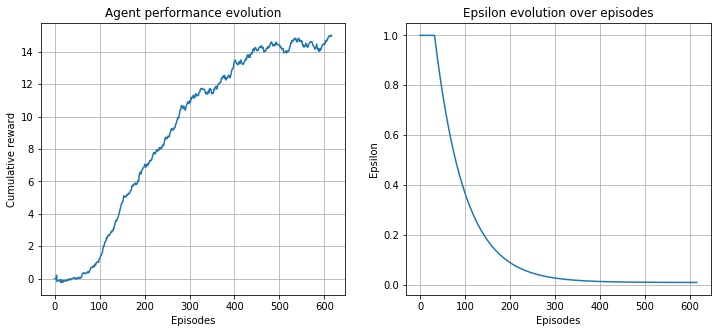

In [3]:
for i in range(n_episodes):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0]  
    done=False
    episodic_score=0
    while not done:
        action = agent.choose_action(state)

        env_info = env.step(int(action))[brain_name]
        reward = env_info.rewards[0]
        next_state = env_info.vector_observations[0]
        done = env_info.local_done[0] 

        agent.step(state=state, action=action, reward=reward, next_state=next_state)
        state = next_state
        episodic_score += reward
    eps.append(agent.epsilon)
    scores.append(episodic_score)
    if i % 100 == 0:
        torch.save(agent.neural_net.net.state_dict(), 'checkpoint.pth')
            
    clear_output(True)
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(ewma(scores))
    plt.grid()
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative reward")
    plt.title("Agent performance evolution")
    plt.subplot(122)
    plt.plot(eps)
    plt.grid()
    plt.xlabel("Episodes")
    plt.ylabel("Epsilon")
    plt.title("Epsilon evolution over episodes")
    plt.show()
    if np.mean(scores[-100:]) >= 15: # We will consider the environment solved when it overcomes a score of 15.
        break # Env solved


### Evaluate the result 

Sometimes it is needed to restart the jupyter notebook before running the code below. If the it freezes, just restart it and start running from here (i.e. jump over the train step).

#### Instantiate the environment 

In [3]:
env = UnityEnvironment(file_name=env_path)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
state_size = brain.vector_observation_space_size
n_actions = brain.vector_action_space_size

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


#### Instantiate the agent and load the pretrained weights

In [6]:
n_episodes = 1500
eps_decay=0.99995
eps_final=0.01
exploration_steps = 10000
tau = 1e-3
learning_rate = 1e-3
exp_replay_size = int(1e5)
update_every = 4
agent = QAgent(n_actions=n_actions, state_size=(state_size,), architecture=MLPArchitecture, 
               epsilon_exp_decay=eps_decay, epsilon_final=eps_final, batch_size=64,
               initial_exploration_steps=exploration_steps, tau = tau, update_every=update_every,
               exp_replay_size=exp_replay_size)
agent.neural_net.net.load_state_dict(torch.load("checkpoint.pth")) # Load the trained agent

#### Run an episode to watch the pretrained agent navigate the environment

In [9]:
env_info = env.reset(train_mode=False)[brain_name]
done=False
state = env_info.vector_observations[0]  
while not done:
        action = agent.choose_action(state, greedy=True)

        env_info = env.step(int(action))[brain_name]
        reward = env_info.rewards[0]
        next_state = env_info.vector_observations[0]
        done = env_info.local_done[0] 
        #agent.step(state=state, action=action, reward=reward, next_state=next_state)
        state = next_state
        #episodic_score += reward

## Result

A high performing agent has been achieved. Check it out in the following gif!

![Result](img/banana_normal.gif)

## Next steps

A set of potential next steps is summarized below
- Implement Dueling Q-Learning
- Implement Double Q-Learning
- Tune better the parameters to achieve better performance
- Implement prioritized experience replay